# Computer Vision CSCI-GA.2272-001 Assignment 1

## Introduction

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

You should perform this assignment in PyTorch, modify this ipython notebook

To install PyTorch, follow instructions at http://pytorch.org/

Please email your assignment to the graders: Yi-Hsiang Kao (ykh342@nyu.edu) and Anshul Sharma (as10950@nyu.edu).

## Warmup [10%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

Use `matplotlib` and ipython notebook's visualization capabilities to display some of these images.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Training a Single Layer Network on MNIST [20%]

Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 50,000 MNIST training images for 10 epochs (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. 
Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

Paste the output into your report.
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Training a Multi-Layer Network on MNIST [20%]

- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

## Training a Convolutional Network on CIFAR [50%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist)

- Give a breakdown of the parameters within the above model, and the overall number.

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
# options
# dataset = 'cifar10'# options: 'mnist' | 'cifar10'
dataset = 'mnist'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [3]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
    classes = (0,1,2,3,4,5,6,7,8,9)
    
elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision 

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
data_iter = iter(train_loader)

images, labels = data_iter.next()
# show images
print(images.type)
print(images.shape)
imshow(torchvision.utils.make_grid(images))

# print labels
batch_lables = [classes[labels[j]] for j in range(batch_size)]
batch_lables = np.array(batch_lables)
batch_lables.reshape(8,8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<built-in method type of Tensor object at 0x7f97526bef78>
torch.Size([64, 1, 28, 28])


array([[5, 0, 0, 2, 9, 9, 4, 8],
       [4, 1, 0, 4, 1, 8, 0, 5],
       [2, 4, 9, 8, 2, 2, 1, 8],
       [6, 8, 1, 5, 3, 6, 5, 7],
       [4, 3, 0, 0, 6, 6, 2, 5],
       [6, 5, 1, 8, 7, 5, 7, 8],
       [3, 4, 4, 3, 7, 1, 3, 7],
       [2, 2, 0, 7, 4, 3, 0, 3]])

In [5]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [6]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))




In [7]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.547528
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.623058
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.369577
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.423018
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.276092
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.260613
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.636483
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.248545
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.203041
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.272373


/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.3325, Accuracy: 9069/10000 (90%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.255628
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.374143
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.148067
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.195316
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.221672
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.317972
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.245207
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.635940
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.319715
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.327251

Test set: Average loss: 0.3052, Accuracy: 9110/10000 (91%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.188076
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.321111
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.415320
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.192437
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.232108
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.436989
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.267803
Train Epoch: 3 [44800/60000 (75%)]	Loss:

In [8]:
# plot out the network weights as images
def vistensor(tensor, ch=0, allkernels=True, nrow=10, padding=1): 
    '''
    vistensor: visuzlization tensor
        @ch: visualization channel 
        @allkernels: visualization all tensores
    ''' 
    
    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
        
    rows = np.min( (tensor.shape[0]//nrow + 1, 64 )  )    
    grid = torchvision.utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

def savetensor(tensor, filename, ch=0, allkernels=False, nrow=10, padding=2):
    '''
    savetensor: save tensor
        @filename: file name
        @ch: visualization channel 
        @allkernels: visualization all tensores
    '''    

    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)    
    torchvision.utils.save_image(tensor, filename, nrow=nrow )

odict_keys(['linear.weight', 'linear.bias'])
torch.Size([10, 784])
torch.Size([10, 1, 28, 28])


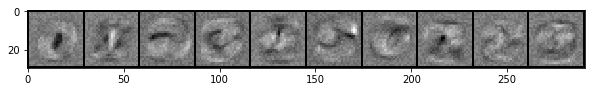

In [9]:
print(network.state_dict().keys())
linear_weights = network.state_dict()['linear.weight']
print(linear_weights.size())

weights = torch.reshape(linear_weights,(10,1,28,28))
print(weights.size())

vistensor(weights, ch=0, allkernels=True)
savetensor(weights,'linear_weights.png', allkernels=True)

**Part 2**

In [10]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [11]:
network_new = Net(num_inputs, num_outputs)
optimizer_new = optim.SGD(network_new.parameters(), lr=lr)

In [12]:
def train_new(epoch):
    network_new.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data[:50]), Variable(target[:50])
        optimizer_new.zero_grad()
        output = network_new(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer_new.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
        if batch_idx == 0:
            break

def test_new():
    network_new.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network_new(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [13]:
for epoch in range(1, epochs + 1):
    train_new(epoch)
    test_new()

/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]
/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.273027

Test set: Average loss: 2.1956, Accuracy: 2108/10000 (21%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.070286

Test set: Average loss: 2.1033, Accuracy: 2660/10000 (26%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.902270

Test set: Average loss: 2.0234, Accuracy: 3210/10000 (32%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.757404

Test set: Average loss: 1.9525, Accuracy: 3700/10000 (37%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 1.629735

Test set: Average loss: 1.8891, Accuracy: 4071/10000 (40%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 1.516010

Test set: Average loss: 1.8320, Accuracy: 4399/10000 (43%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 1.414097

Test set: Average loss: 1.7805, Accuracy: 4644/10000 (46%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 1.322387

Test set: Average loss: 1.7340, Accuracy: 4808/10000 (48%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 1.239578

Test set: Average loss: 1.6918, Accuracy: 4960/10000 (49%)

Train Epoch: 10 [0/60000 (0%)]	Loss: 1.164581


odict_keys(['linear.weight', 'linear.bias'])
torch.Size([10, 784])
torch.Size([10, 1, 28, 28])


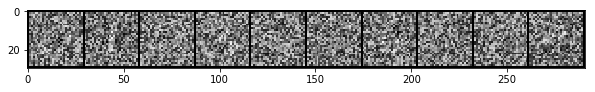

In [14]:
print(network.state_dict().keys())
linear_weights = network_new.state_dict()['linear.weight']
print(linear_weights.size())

weights = torch.reshape(linear_weights,(10,1,28,28))
print(weights.size())

vistensor(weights, ch=0, allkernels=True)
savetensor(weights,'linear_weights_new.png', allkernels=True)

**Part 3**

In [15]:
## network and optimizer (Multi-Layer)
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
hidden_layer_n = 1000

class MultiLayerNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(MultiLayerNet, self).__init__()
        self.linear1 = nn.Linear(num_inputs, hidden_layer_n)
        self.linear2 = nn.Linear(hidden_layer_n, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear1(input)
        output = nn.functional.tanh(output)
        output = self.linear2(output)
        
        return output

multilayer_network = MultiLayerNet(num_inputs, num_outputs)
multilayer_optimizer = optim.SGD(multilayer_network.parameters(), lr=lr)

In [16]:
def train_ml(epoch):
    multilayer_network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        multilayer_optimizer.zero_grad()
        output = multilayer_network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        multilayer_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test_ml():
    multilayer_network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = multilayer_network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [17]:
for epoch in range(1, epochs + 1):
    train_ml(epoch)
    test_ml()

/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.339160
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.663768
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.510604
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.470102
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.332665
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.422405
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.288102
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.459611
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.407794
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.438682


/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.3243, Accuracy: 9074/10000 (90%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.263619
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.281818
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.249488
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.340685
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.230679
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.352722
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.219332
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.402821
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.334516
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.435654

Test set: Average loss: 0.2833, Accuracy: 9178/10000 (91%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.202502
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.256309
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.201806
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.299022
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.206980
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.325812
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.191717
Train Epoch: 3 [44800/60000 (75%)]	Loss:

In [18]:
lr = 10.0

In [19]:
multilayer_network = MultiLayerNet(num_inputs, num_outputs)
multilayer_optimizer = optim.SGD(multilayer_network.parameters(), lr=lr)

In [20]:
for epoch in range(1, epochs + 1):
    train_ml(epoch)
    test_ml()

/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.382459
Train Epoch: 1 [6400/60000 (11%)]	Loss: 633.075867
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1082.264404
Train Epoch: 1 [19200/60000 (32%)]	Loss: 487.788239
Train Epoch: 1 [25600/60000 (43%)]	Loss: 396.937958
Train Epoch: 1 [32000/60000 (53%)]	Loss: 381.727814
Train Epoch: 1 [38400/60000 (64%)]	Loss: 312.865204
Train Epoch: 1 [44800/60000 (75%)]	Loss: 260.662170
Train Epoch: 1 [51200/60000 (85%)]	Loss: 386.504089
Train Epoch: 1 [57600/60000 (96%)]	Loss: 638.929932


/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 287.2019, Accuracy: 5338/10000 (53%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 205.460419
Train Epoch: 2 [6400/60000 (11%)]	Loss: 612.631897
Train Epoch: 2 [12800/60000 (21%)]	Loss: 215.502991
Train Epoch: 2 [19200/60000 (32%)]	Loss: 234.541290
Train Epoch: 2 [25600/60000 (43%)]	Loss: 192.143723
Train Epoch: 2 [32000/60000 (53%)]	Loss: 256.121948
Train Epoch: 2 [38400/60000 (64%)]	Loss: 515.850342
Train Epoch: 2 [44800/60000 (75%)]	Loss: 229.049774
Train Epoch: 2 [51200/60000 (85%)]	Loss: 270.254700
Train Epoch: 2 [57600/60000 (96%)]	Loss: 260.544647

Test set: Average loss: 424.1674, Accuracy: 4428/10000 (44%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 449.520142
Train Epoch: 3 [6400/60000 (11%)]	Loss: 280.421051
Train Epoch: 3 [12800/60000 (21%)]	Loss: 239.058548
Train Epoch: 3 [19200/60000 (32%)]	Loss: 112.563522
Train Epoch: 3 [25600/60000 (43%)]	Loss: 464.898712
Train Epoch: 3 [32000/60000 (53%)]	Loss: 119.945892
Train Epoch: 3 [38400/60000 (64%)]	Loss: 295.081451
Tr

In [21]:
lr = 0.01

In [22]:
epochs = 20

In [23]:
dataset = 'cifar10'

In [24]:
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
    classes = (0,1,2,3,4,5,6,7,8,9)
    
elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [25]:
## network and optimizer (CNN)
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3,16,5)
        self.conv2 = nn.Conv2d(16,128,5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(128 * 5 * 5, 64) 
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.tanh(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.tanh(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
convolutional_neural_network = CNN()
cnn_optimizer = optim.SGD(convolutional_neural_network.parameters(), lr=lr)

In [26]:

def train_CNN(epoch):
    convolutional_neural_network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        cnn_optimizer.zero_grad()
        output = convolutional_neural_network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        cnn_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test_CNN():
    convolutional_neural_network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = convolutional_neural_network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [27]:
for epoch in range(1, epochs + 1):
    train_CNN(epoch)
    test_CNN()

/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.298837
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.144694
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.026865
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.848931
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.980116
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.996980
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.752800
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.631881


/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 1.7878, Accuracy: 3749/10000 (37%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.875073
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.730465
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.658528
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.802439
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.568752
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.844818
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.744517
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.473571

Test set: Average loss: 1.6221, Accuracy: 4184/10000 (41%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.708581
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.697245
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.540659
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.291800
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.483956
Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.315792
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.369882
Train Epoch: 3 [44800/50000 (90%)]	Loss: 1.483544

Test set: Average loss: 1.5113, Accuracy: 4596/10000 (45%)

Train Epoch: 4 [0/50000 (0%)]

Train Epoch: 19 [44800/50000 (90%)]	Loss: 0.834571

Test set: Average loss: 0.9838, Accuracy: 6588/10000 (65%)

Train Epoch: 20 [0/50000 (0%)]	Loss: 0.676234
Train Epoch: 20 [6400/50000 (13%)]	Loss: 0.975860
Train Epoch: 20 [12800/50000 (26%)]	Loss: 0.795712
Train Epoch: 20 [19200/50000 (38%)]	Loss: 0.865622
Train Epoch: 20 [25600/50000 (51%)]	Loss: 0.550276
Train Epoch: 20 [32000/50000 (64%)]	Loss: 0.703082
Train Epoch: 20 [38400/50000 (77%)]	Loss: 0.869473
Train Epoch: 20 [44800/50000 (90%)]	Loss: 0.875261

Test set: Average loss: 0.9368, Accuracy: 6718/10000 (67%)



In [55]:
# print(network.state_dict().keys())
linear_weights = convolutional_neural_network.state_dict()['linear.weight']

weights = torch.reshape(linear_weights,(10,1,28,28))

vistensor(weights, ch=0, allkernels=True)
savetensor(weights,'linear_weights_new.png', allkernels=True)

KeyError: 'linear.weight'

In [ ]:
print(convolutional_neural_network)

In [83]:
from torchsummary import summary
summary(convolutional_neural_network, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]           1,216
            Conv2d-2          [-1, 128, 10, 10]          51,328
            Linear-3                   [-1, 64]         204,864
            Linear-4                   [-1, 10]             650
Total params: 258,058
Trainable params: 258,058
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.19
Params size (MB): 0.98
Estimated Total Size (MB): 1.19
----------------------------------------------------------------


/home/lekha/miniconda3/envs/aims-ml/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


torch.Size([16, 3, 5, 5])


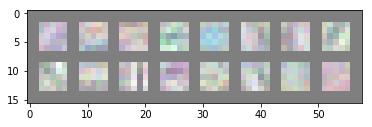

In [34]:
filter1 = convolutional_neural_network.conv1.weight.data
print(filter1.shape)
# vistensor(filter1, ch=0, allkernels=True)
imshow(torchvision.utils.make_grid(filter1, normalize = True))